In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #data visualizing
import networkx as nx
import seaborn as sns #data visualizing
from collections import Counter #cound in dict format

Load The Data

In [36]:
df = pd.read_csv('facebook_data.csv')

In [37]:
df.head()

created_time_x               from_id             from_name  \
0  2017-07-14T14:43:54+0000  33661642d99eeceeb086  4ca212f16b9f954d5e0a   
1  2017-07-14T14:41:59+0000  33661642d99eeceeb086  4ca212f16b9f954d5e0a   
2  2017-07-14T14:41:58+0000  142b054b9d7f119260fa  210f51cc65568bf2d528   
3  2017-07-14T14:42:25+0000  52228acb5d5ca468be8c  46377b3cde64b2bf93dc   
4  2017-07-14T14:40:46+0000  af7fe02906a110370810  087accbb0dc7c975d194   

                                           message_x  \
0  We are speaking to NRA supporters as well as W...   
1  If you are just joining us we are outside of t...   
2  Do you know how backward America are in allowi...   
3  People who legally own guns often seem all too...   
4  Have you snowflakes watched the news and seen ...   

                                post_name          post_id_x  \
0  33661642d99eeceeb086_10154890879532217  10154890879532217   
1  33661642d99eeceeb086_10154890879532217  10154890879532217   
2  142b054b9d7f119260fa_10154890879532217  10154890879532217   
3  52228acb5d5ca468be8c_10154890879532217  10154890879532217   
4  af7fe02906a110370810_10154890879532217  10154890879532217   

             created_time_y description  \
0  2017-07-14T14:30:59+0000         NaN   
1  2017-07-14T14:30:59+0000         NaN   
2  2017-07-14T14:30:59+0000         NaN   
3  2017-07-14T14:30:59+0000         NaN   
4  2017-07-14T14:30:59+0000         NaN   

                                                link  \
0  https://www.facebook.com/bbcnews/videos/101548...   
1  https://www.facebook.com/bbcnews/videos/101548...   
2  https://www.facebook.com/bbcnews/videos/101548...   
3  https://www.facebook.com/bbcnews/videos/101548...   
4  https://www.facebook.com/bbcnews/videos/101548...   

                                           message_y  ...  react_angry  \
0  We are #LIVE outside the National Rifle Associ...  ...           54   
1  We are #LIVE outside the National Rifle Associ...  ...           54   
2  We are #LIVE outside the National Rifle Associ...  ...           54   
3  We are #LIVE outside the National Rifle Associ...  ...           54   
4  We are #LIVE outside the National Rifle Associ...  ...           54   

  react_haha  react_like  react_love  react_sad  react_wow  \
0         24         993         144         12         24   
1         24         993         144         12         24   
2         24         993         144         12         24   
3         24         993         144         12         24   
4         24         993         144         12         24   

                  scrape_time  shares                 id  page_name  
0  2017-07-14 11:01:24.379857     139  10154890879532217        bbc  
1  2017-07-14 11:01:24.379857     139  10154890879532217        bbc  
2  2017-07-14 11:01:24.379857     139  10154890879532217        bbc  
3  2017-07-14 11:01:24.379857     139  10154890879532217        bbc  
4  2017-07-14 11:01:24.379857     139  10154890879532217        bbc  

[5 rows x 22 columns]

In [38]:
df.columns

Index(['created_time_x', 'from_id', 'from_name', 'message_x', 'post_name',
       'post_id_x', 'created_time_y', 'description', 'link', 'message_y',
       'page_id', 'post_id_y', 'react_angry', 'react_haha', 'react_like',
       'react_love', 'react_sad', 'react_wow', 'scrape_time', 'shares', 'id',
       'page_name'],
      dtype='object')

In [39]:
list(df.groupby('page_name').groups.keys())

['abc_news',
 'al_jazeera',
 'associated_press',
 'bbc',
 'bloomberg_politics',
 'breitbart',
 'business_insider',
 'buzzfeed_news',
 'cbs_news',
 'chicago_tribune',
 'christian_science_monitor',
 'cnbc',
 'cnn',
 'daily_beast',
 'daily_caller',
 'daily_kos',
 'daily_mail',
 'daily_signal',
 'democratic_undergound',
 'drudge_report',
 'economist',
 'financial_times',
 'fox_news',
 'huffington_post',
 'independent_journal_review',
 'infowars',
 'la_times',
 'los_angeles_times',
 'miami_herald',
 'morning_joe',
 'mother_jones',
 'msnbc',
 'national_review',
 'nbc_news',
 'newsmax',
 'newsweek',
 'npr',
 'ny_dailynews',
 'ny_times',
 'one_america_news',
 'pbs_newshour',
 'person_alex_jones',
 'person_anderson_cooper',
 'person_ann_coulter',
 'person_bill_mahar',
 'person_chris_hayes',
 'person_chris_matthews',
 'person_erin_burnett',
 'person_joe_scarobourgh',
 'person_megyn_kelly',
 'person_neil_cavuto',
 'person_rachel_maddow',
 'person_rush_limbaugh',
 'person_sean_hannity',
 'person_s

Filter CNN Social Page Data from the DF

In [40]:
df = df[df['page_name'].isin(['cnn'])]

In [41]:
df.shape

(24608, 22)

Get sample of data

In [42]:
df = df.sample(frac=0.8)
df.shape

(19686, 22)

Get CNN associated post ids

In [43]:
page_list = {}
post_list = []

for line in df.itertuples():
    if line.page_name not in page_list:
        page_list[line.page_name] = [line.post_id_x]
    else:
        page_list[line.page_name].append(line.post_id_x)
    post_list.append(line.post_id_x)

In [44]:
page_list

{'cnn': [10157040860286509,
  10157039264401509,
  10157034303626509,
  10157030522651509,
  10157042605076509,
  10157033191081509,
  10157046297296509,
  10157036110881509,
  10157040346736509,
  10157030641226509,
  10157038021036509,
  10157040767366509,
  10157031286901509,
  10157042491791509,
  10157039059686509,
  10157050163076509,
  10157034053131509,
  10157034167716509,
  10157034303626509,
  10157041964661509,
  10157033464496509,
  10157029876346509,
  10157030641226509,
  10157051594841509,
  10157039337941509,
  10157036396441509,
  10157031609466509,
  10157038154611509,
  10157033384551509,
  10157033900271509,
  10157044757766509,
  10157034404761509,
  10157047719756509,
  10157035387146509,
  10157030127591509,
  10157045867491509,
  10157035337126509,
  10157037180856509,
  10157038021036509,
  10157031163181509,
  10157038154611509,
  10157031539981509,
  10157048155441509,
  10157043613321509,
  10157040623146509,
  10157050314006509,
  10157042069751509,
  1015

In [45]:
page_list.keys()

dict_keys(['cnn'])

Define a graph variable

In [46]:
G = nx.from_pandas_edgelist(df, source='post_id_x', target='from_id')

In [47]:
degree_size = list(dict(G.degree()).values())

calculate degree sequance

In [48]:
degree_freq = Counter(degree_size)
dregs,frq = zip(*degree_freq.items())

plotting degree sequance

Text(0.5, 1.0, 'Degree Distribution')

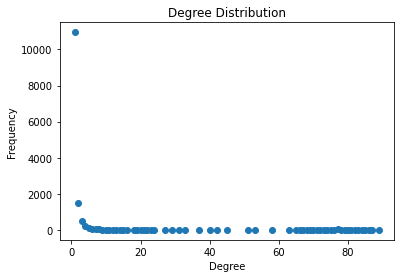

In [49]:
plt.scatter(dregs,frq)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')

In [50]:
len(degree_size)

13769

generate color

In [51]:
import random

number_of_colors = len(df.groupby('page_name'))
pages = list(df.groupby('page_name').groups.keys())
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]
print(color)

['#6D2E1D']


In [52]:
colors = {}
i = 0
for c in color:
    colors[pages[i]] = c
    i += 1
colors

{'cnn': '#6D2E1D'}

In [53]:
node_col = {}
for d in list(dict(G.degree).keys()):
    print(d)
node_col

10157040860286509
44e988507f36a3181741
10157039264401509
70398ab607caa9f73e39
10157034303626509
58ebf591db94dbe4e6c0
10157030522651509
0f8d0299f9188dab2363
10157042605076509
f02ab80f170a4f1c4228
10157033191081509
40288aeb9b0217dad03c
10157046297296509
d74ff7338fbf7e5a33c5
10157036110881509
afb51e240dd1f938f02c
10157040346736509
005fb83a8e680fc16e91
10157030641226509
fc085a6ce5de2522d3d6
10157038021036509
1016775c085065066168
10157040767366509
fad92ead7db6236177f4
10157031286901509
fdf27227c2c68deecbbf
10157042491791509
a40ab100bcada15602bc
10157039059686509
3a2afda55b507d59cb78
10157050163076509
3b93366504a547d8670e
10157034053131509
58b368e517b56c597a44
10157034167716509
2ec6fb919917d9614cf4
b12e44c37a3b198d7410
10157041964661509
bc268d94e2e8457388a5
10157033464496509
c81a5223edff9110b021
10157029876346509
7d6bab7c35cb0386b6b4
dffa37d44fd0fb37f486
10157051594841509
8f7c10c82eb8d349b631
10157039337941509
770ac9f03cae27cc91d7
10157036396441509
fc79f21c56ddb0ed8fa9
10157031609466509
bfe2

{}

Assign colors to Node

In [54]:
node_col = {}
for d in list(dict(G.degree).keys()):
    if d in  page_list['cnn']:
        node_col[d] = 'green'
    else:
        node_col[d] = 'blue'
node_col

{10157040860286509: 'green',
 '44e988507f36a3181741': 'blue',
 10157039264401509: 'green',
 '70398ab607caa9f73e39': 'blue',
 10157034303626509: 'green',
 '58ebf591db94dbe4e6c0': 'blue',
 10157030522651509: 'green',
 '0f8d0299f9188dab2363': 'blue',
 10157042605076509: 'green',
 'f02ab80f170a4f1c4228': 'blue',
 10157033191081509: 'green',
 '40288aeb9b0217dad03c': 'blue',
 10157046297296509: 'green',
 'd74ff7338fbf7e5a33c5': 'blue',
 10157036110881509: 'green',
 'afb51e240dd1f938f02c': 'blue',
 10157040346736509: 'green',
 '005fb83a8e680fc16e91': 'blue',
 10157030641226509: 'green',
 'fc085a6ce5de2522d3d6': 'blue',
 10157038021036509: 'green',
 '1016775c085065066168': 'blue',
 10157040767366509: 'green',
 'fad92ead7db6236177f4': 'blue',
 10157031286901509: 'green',
 'fdf27227c2c68deecbbf': 'blue',
 10157042491791509: 'green',
 'a40ab100bcada15602bc': 'blue',
 10157039059686509: 'green',
 '3a2afda55b507d59cb78': 'blue',
 10157050163076509: 'green',
 '3b93366504a547d8670e': 'blue',
 1015703

In [55]:
# node_col = {}
# for d in list(dict(G.degree).keys()):
#     for k,v in page_list.items():
#         if d in k:
#             col = colors.get(k)
#             node_col[d] = col
#             break
#         else:
#             if node_col.get(d,0) == 0:
#                 node_col[d] = 'blue'
# node_col

In [56]:
node_color=[ node_col.get(k) for k,v in dict(G.degree()).items()]

create graph 

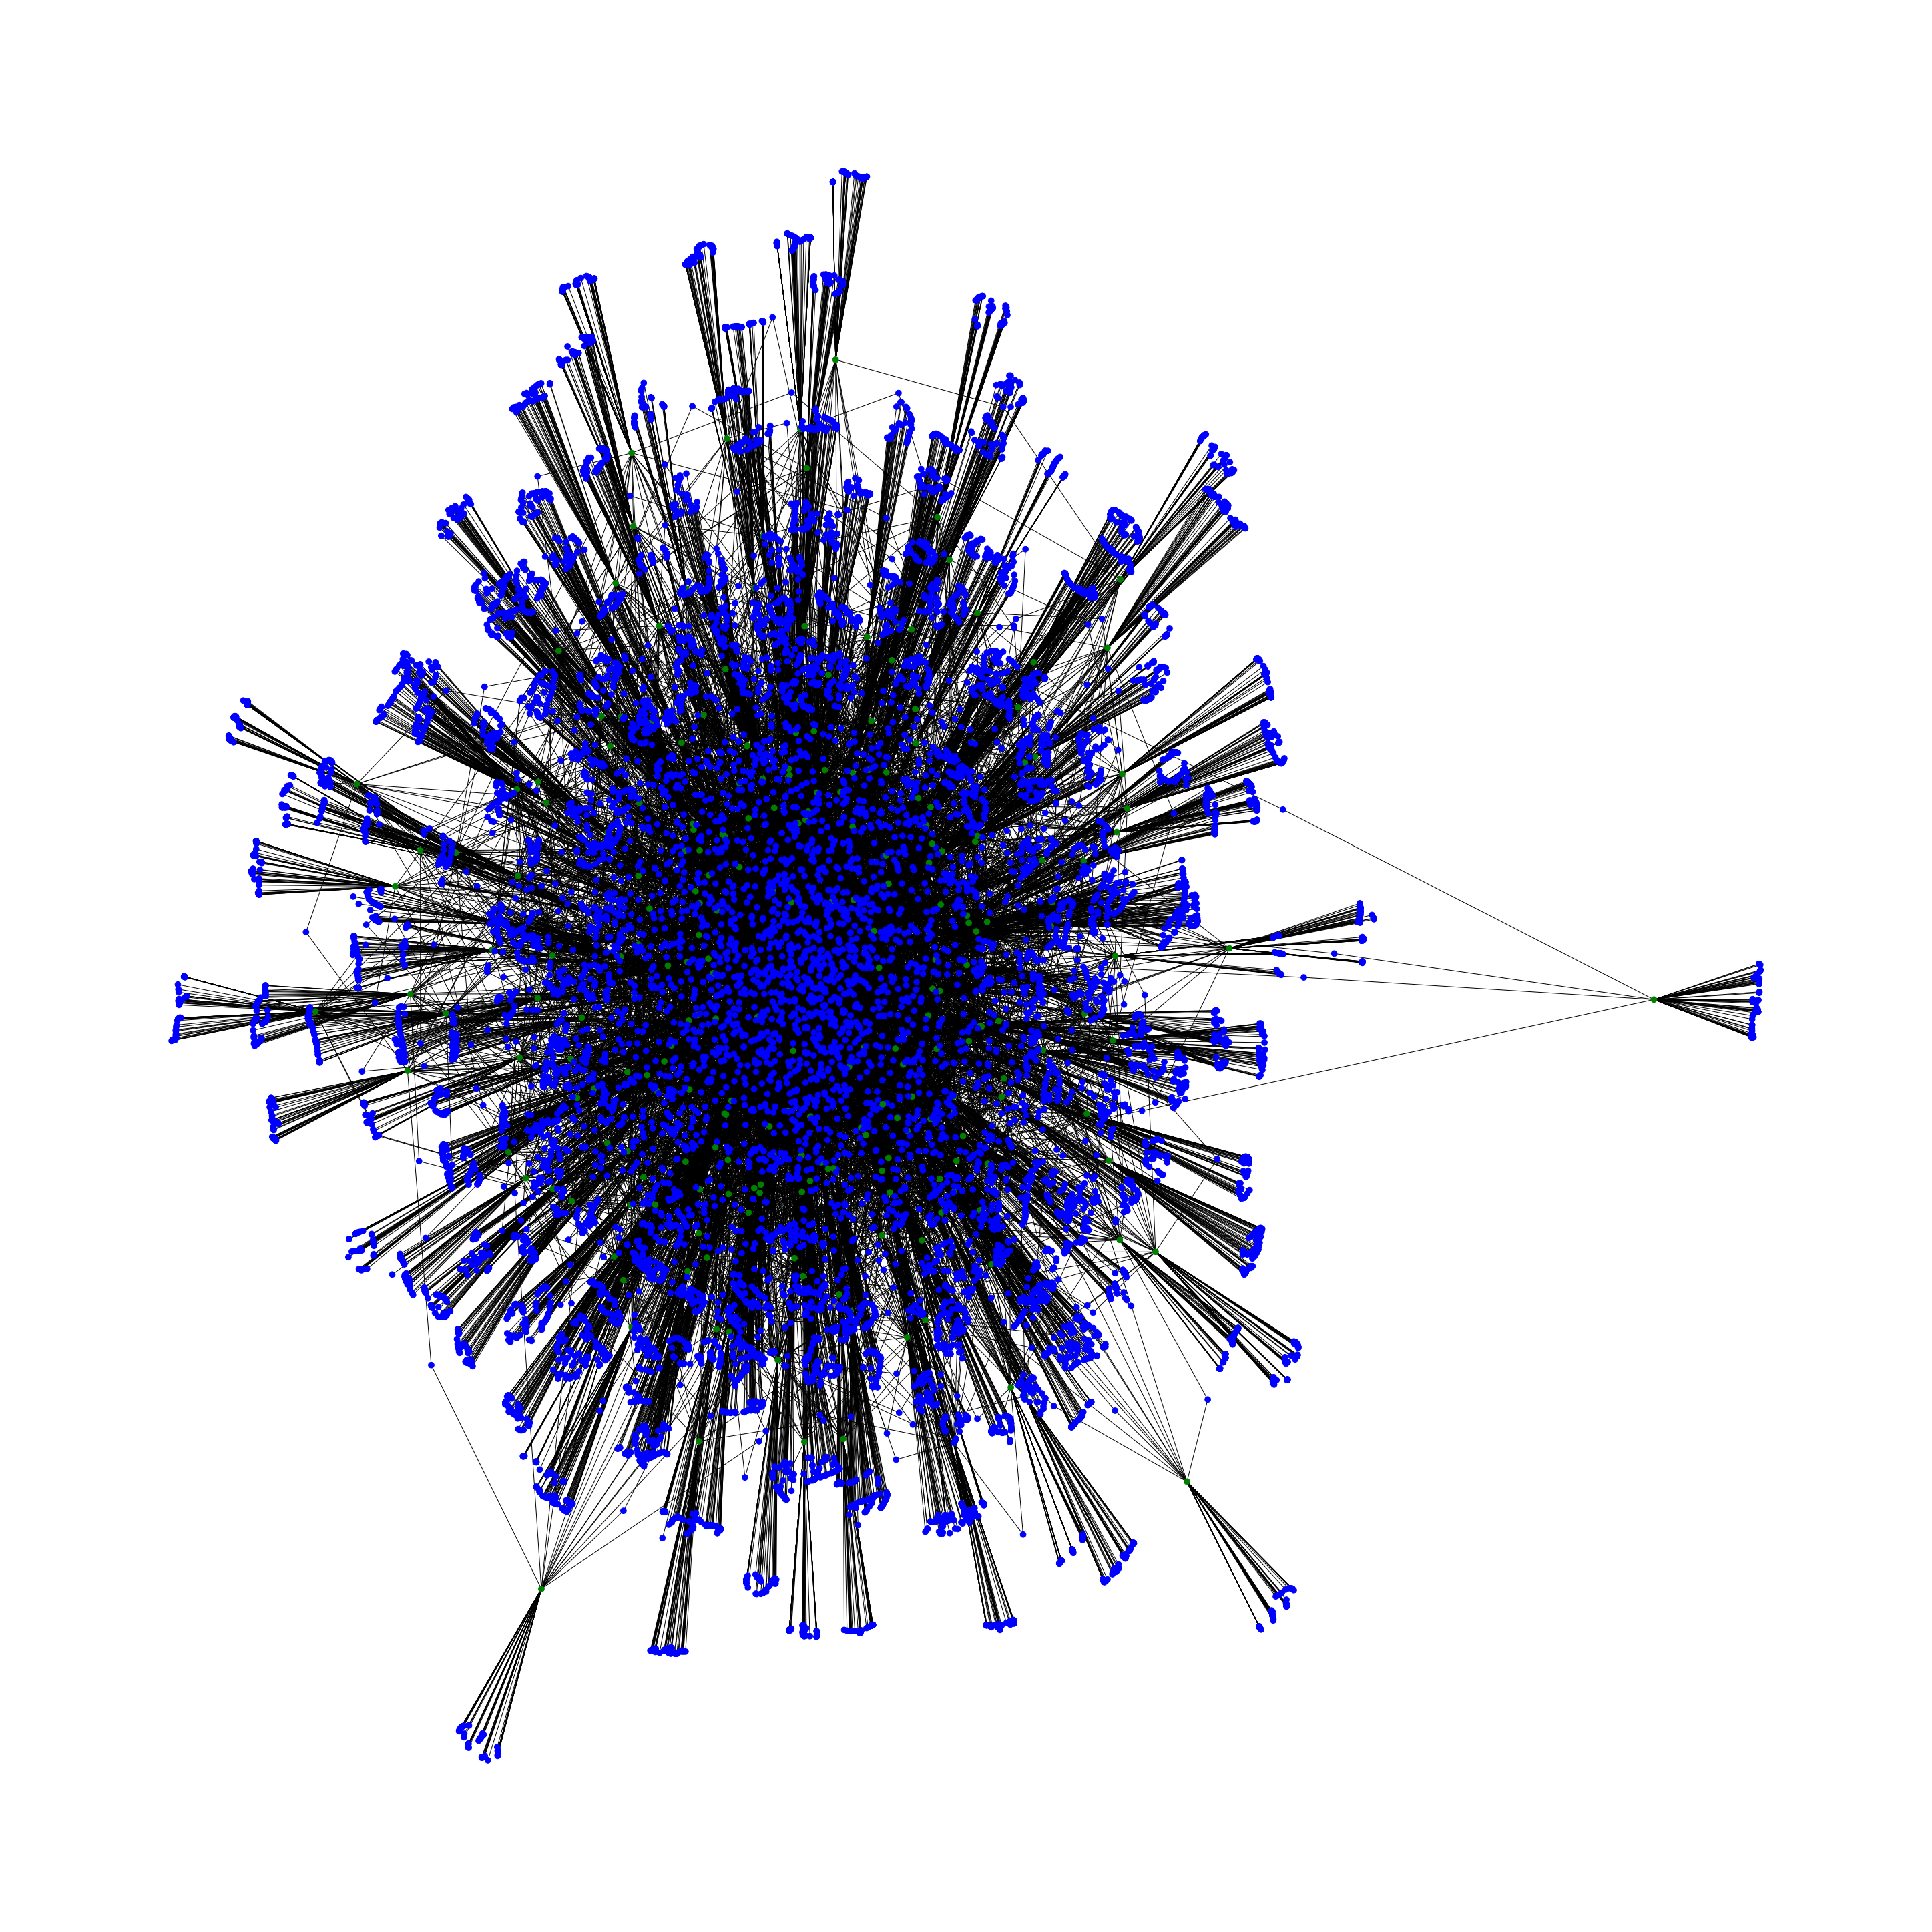

In [57]:
plt.figure(figsize=[40,40])
layout = nx.spring_layout(G)
nx.draw(G,pos=layout,node_color=node_color,node_size=75)

Find influencers in the network

In [58]:
#degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{10157040860286509: 0.005665310865775711,
 '44e988507f36a3181741': 0.0001452643811737362,
 10157039264401509: 0.0055200464846019755,
 '70398ab607caa9f73e39': 0.0003631609529343405,
 10157034303626509: 0.005810575246949448,
 '58ebf591db94dbe4e6c0': 7.26321905868681e-05,
 10157030522651509: 0.005447414294015108,
 '0f8d0299f9188dab2363': 0.0001452643811737362,
 10157042605076509: 0.005955839628123184,
 'f02ab80f170a4f1c4228': 0.0001452643811737362,
 10157033191081509: 0.0055200464846019755,
 '40288aeb9b0217dad03c': 0.0013073794305636258,
 10157046297296509: 0.005374782103428239,
 'd74ff7338fbf7e5a33c5': 7.26321905868681e-05,
 10157036110881509: 0.005665310865775711,
 'afb51e240dd1f938f02c': 7.26321905868681e-05,
 10157040346736509: 0.005810575246949448,
 '005fb83a8e680fc16e91': 0.0001452643811737362,
 10157030641226509: 0.004938988959907031,
 'fc085a6ce5de2522d3d6': 7.26321905868681e-05,
 10157038021036509: 0.00610110400929692,
 '1016775c085065066168': 7.26321905868681e-05,
 1015704076736

<AxesSubplot:>

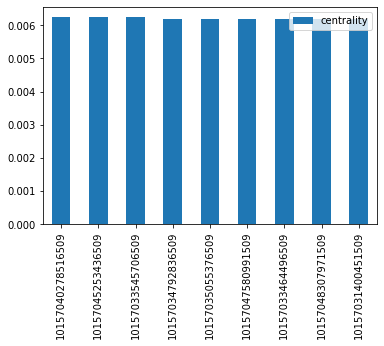

In [59]:
degree_df = pd.DataFrame.from_dict(degree_dict,orient='index',columns=['centrality'])
degree_df.sort_values('centrality',ascending=False)[4:13].plot(kind='bar')

In [60]:
sorted_influe  = degree_df.sort_values('centrality',ascending=False)[4:13]

Find the bridges between communities 

<AxesSubplot:>

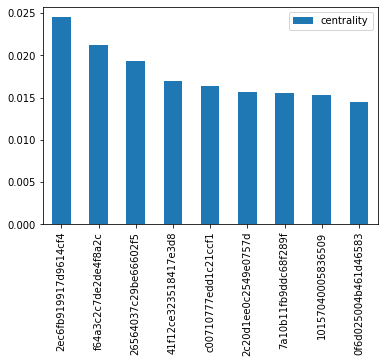

In [61]:
#Betweennes centrality

between_dict = nx.betweenness_centrality(G)
between_df = pd.DataFrame.from_dict(between_dict,orient='index',columns=['centrality'])
between_df.sort_values('centrality',ascending=False)[4:13].plot(kind='bar')

In [62]:
sorted_brtwn = between_df.sort_values('centrality',ascending=False)[4:13]

Find closes centrality based on distance

<AxesSubplot:>

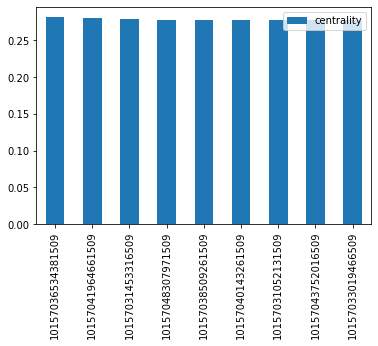

In [63]:
#closness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict,orient='index',columns=['centrality'])
closeness_df.sort_values('centrality',ascending=False)[4:13].plot(kind='bar')

In [64]:
sorted_influe.index

Index([10157040278516509, 10157045253436509, 10157033545706509,
       10157034792836509, 10157035055376509, 10157047580991509,
       10157033464496509, 10157048307971509, 10157031400451509],
      dtype='object')

Assign name for each influencers

In [65]:
influe_dict = {}
i = 1
for k in sorted_influe.index:
    influe_dict[k] = "User "+str(i)
    i += 1
influe_dict

{10157040278516509: 'User 1',
 10157045253436509: 'User 2',
 10157033545706509: 'User 3',
 10157034792836509: 'User 4',
 10157035055376509: 'User 5',
 10157047580991509: 'User 6',
 10157033464496509: 'User 7',
 10157048307971509: 'User 8',
 10157031400451509: 'User 9'}

display all the data in network graph

Green - Post    /
Blue - peoples  /
Red - Influecers    /
Yellow - Bridges between communities

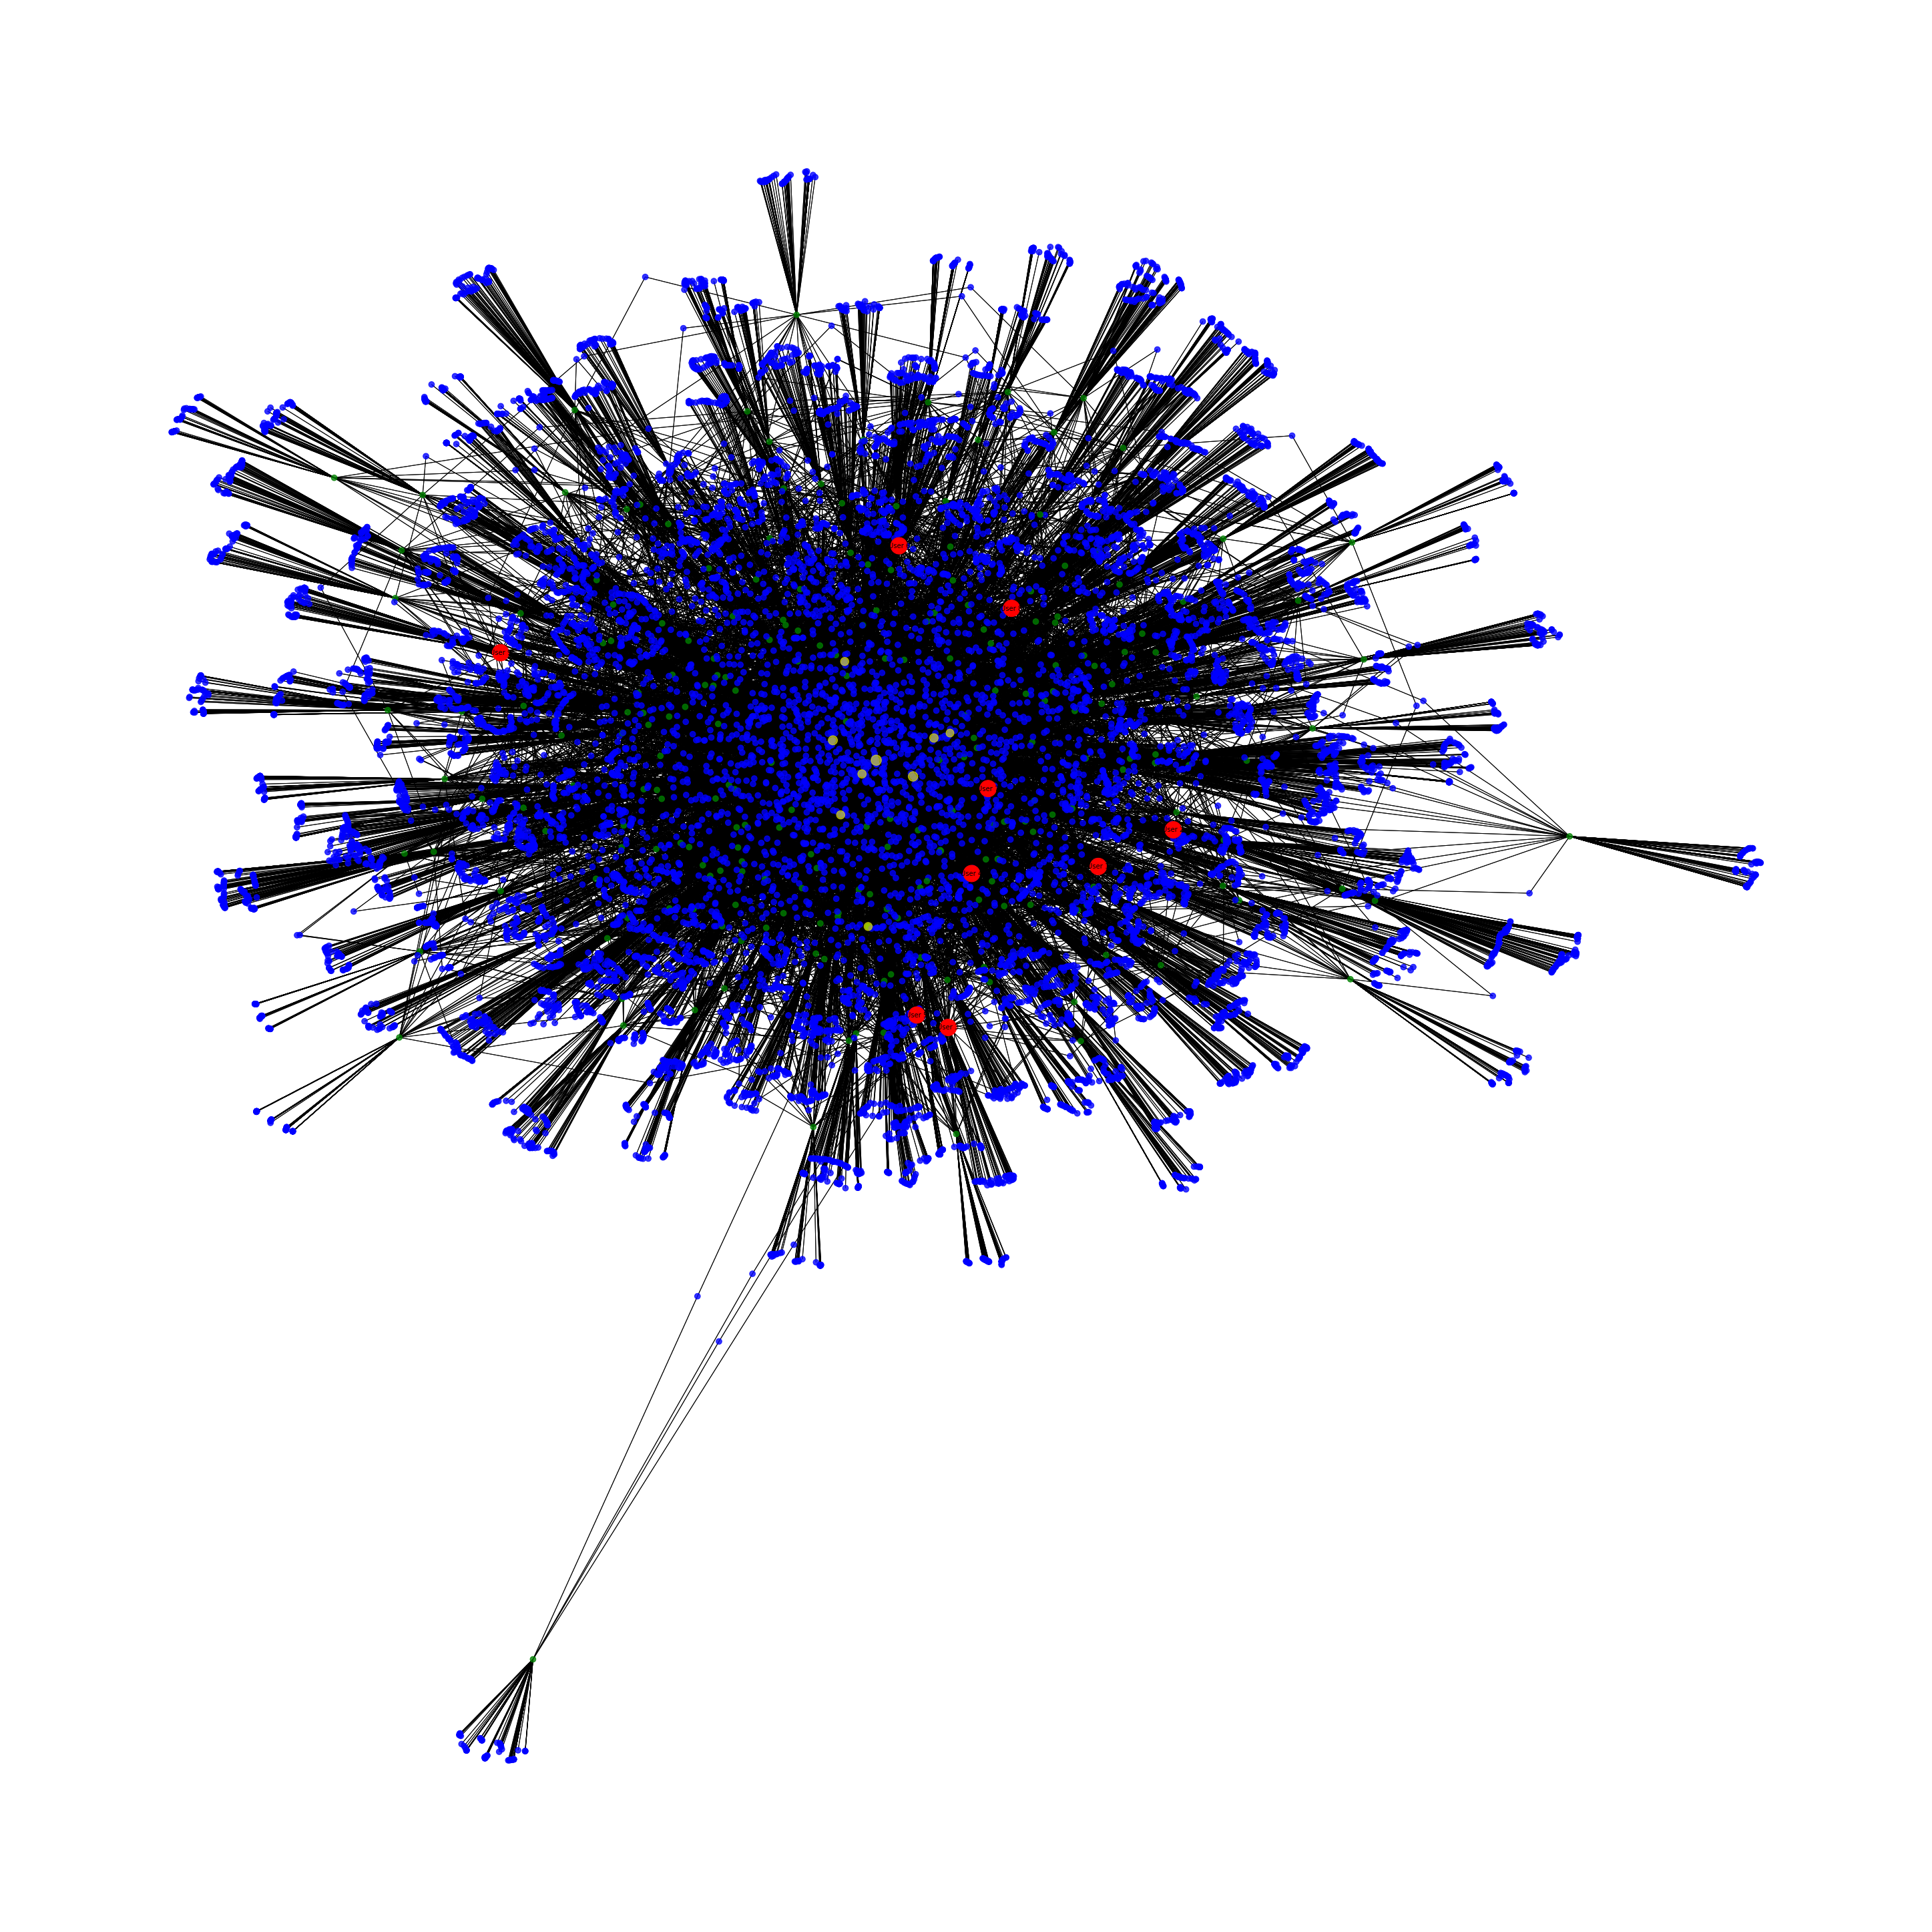

In [66]:
plt.figure(figsize=[40,40])
layout = nx.spring_layout(G)
nx.draw(G,pos = layout,node_color=node_color,node_size=75,edge_color='gray',width=1,alpha=0.8)
nx.draw(G,pos=layout,alpha = 1,nodelist = list(sorted_influe.index),node_color='red',node_size=[ int(i*1000_00) for i in sorted_influe.centrality],with_labels=False)
nx.draw_networkx_labels(G,pos=layout,labels = influe_dict,font_size=10)
nx.draw(G,pos=layout,alpha = 0.6,nodelist = list(sorted_brtwn.index),node_color='yellow',node_size=[ int(i*10000) for i in sorted_brtwn.centrality],with_labels=False)
plt.show()